In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("heart.csv")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


**Split Dataset to features and target**

In [4]:
X = data.drop('target', axis=1) #features
y = data['target'] #target

**Split data to training Set and Test Set**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


**decision tree classifier model without solving the overfit**

In [6]:
heart_disases_classifier = DecisionTreeClassifier(random_state=0)

**Training the model**

In [7]:
heart_disases_classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

**Try to predict the test set results**

In [8]:
y_pred = heart_disases_classifier.predict(X_test)
predict_train= heart_disases_classifier.predict(X_train)## calculate the prediction of pre-trained data to compare the accuracy with the test data

**Represent the tree of overfit model**

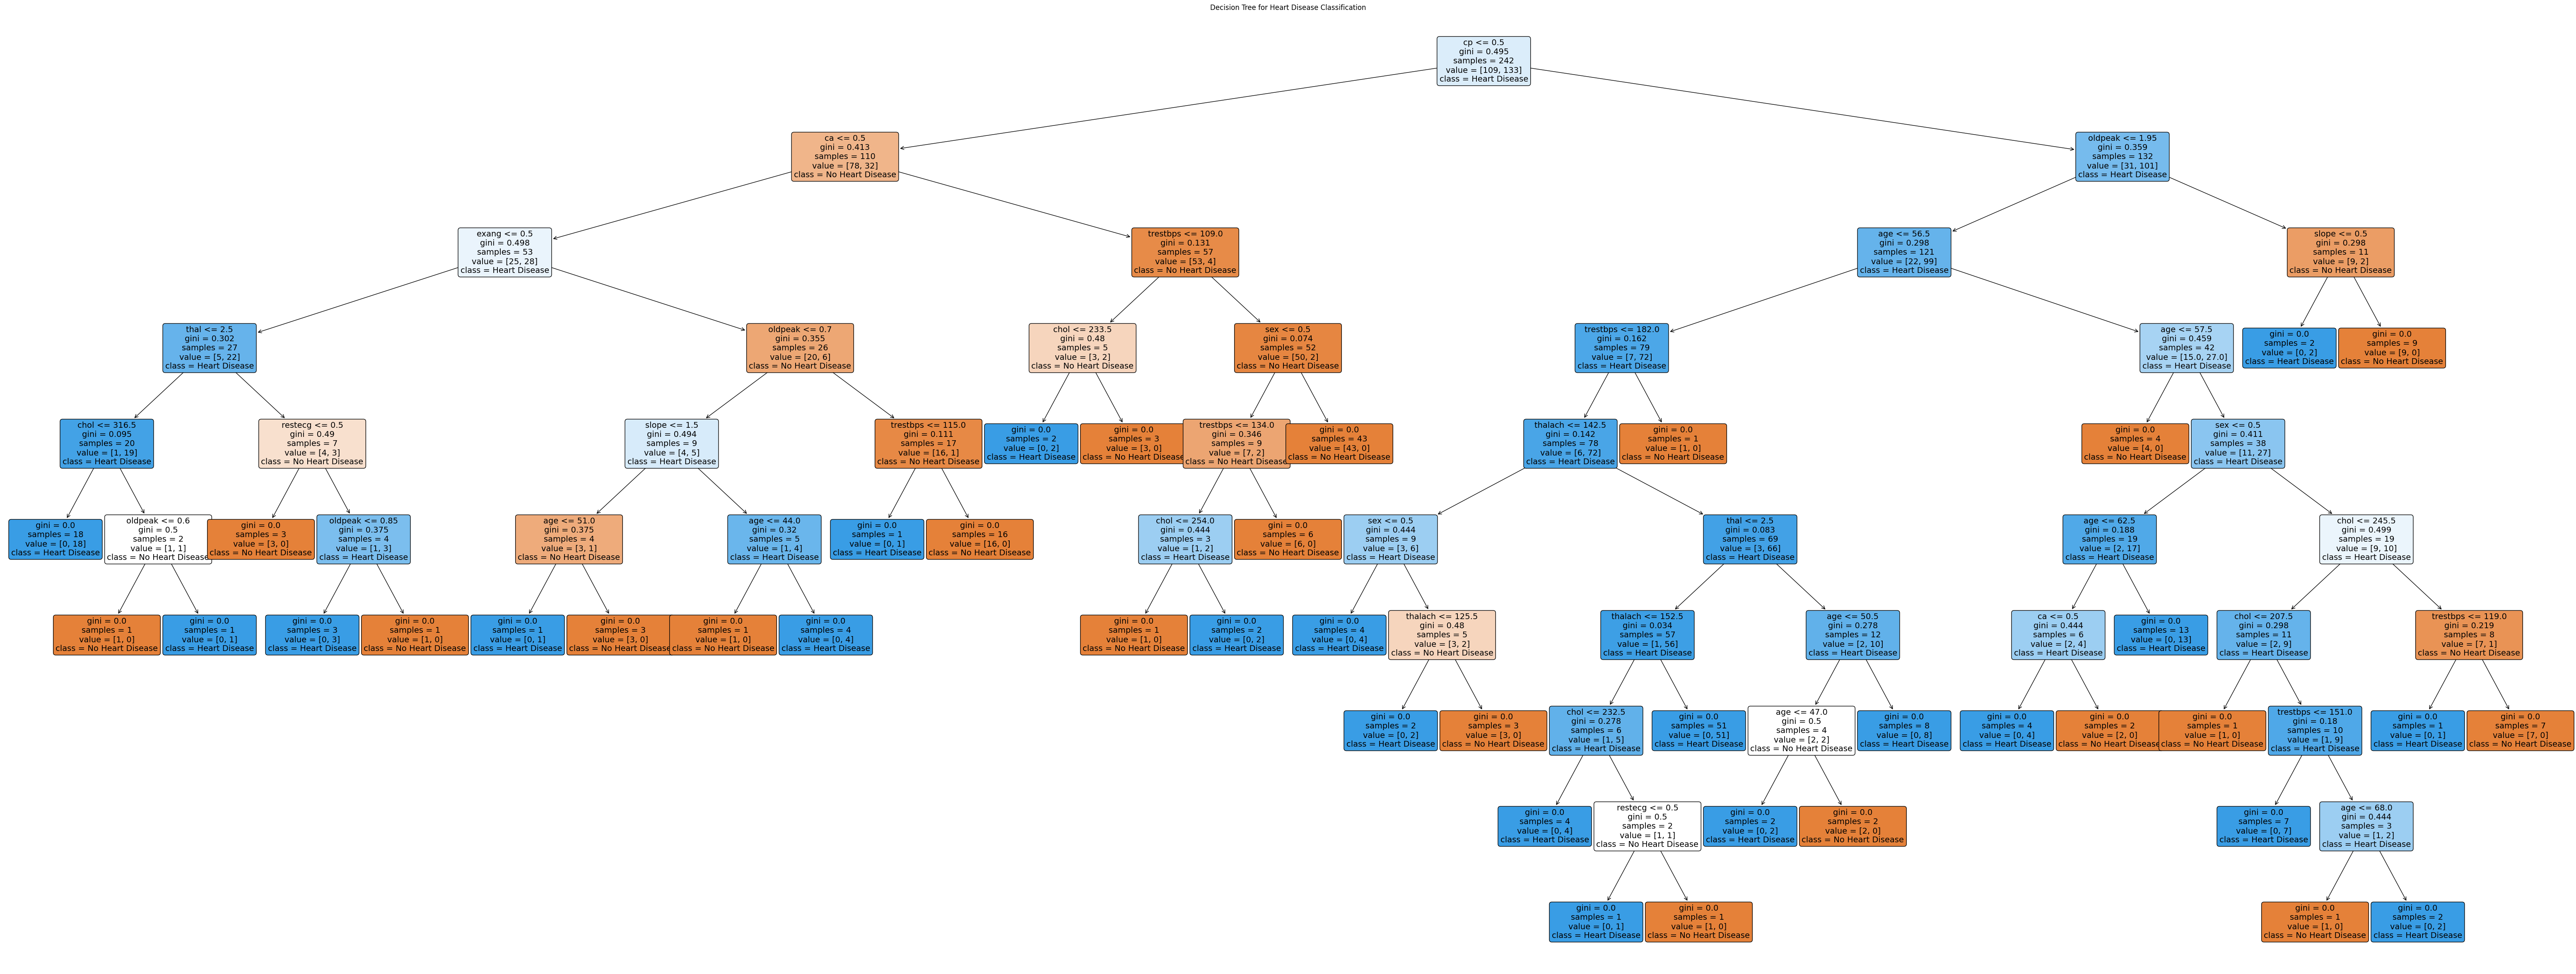

In [12]:
plt.figure(figsize=(80,30))
plot_tree(heart_disases_classifier, filled=True, feature_names=X.columns, class_names=["No Heart Disease", "Heart Disease"], rounded=True, fontsize=14)
plt.title("Decision Tree for Heart Disease Classification")
plt.savefig('overfit.png')
plt.show()


**Evaluate the model using confusion matrix function,below code ,we make comaprsion between the accurcay predicting pre-trained data and the test data
to calcualte the accuracy from confusion matrix , We used the equation : `accuracy = (TP+TN) / (TP+TN+FP+FN)` , where `TP = true_positive` , `TN = true_negative` , `FP = false_positive` , `FN = false_negative`**

In [505]:
def accuracy(confusionMatrix):
    tp = confusionMatrix[0][0]
    tn = confusionMatrix[1][1]
    fp = confusionMatrix[0][1]
    fn = confusionMatrix[1][0]
    total = tp + tn + fp + fn
    if total == 0:
        return 0
    accuracy = (tp+tn)/total
    return accuracy

#accuracy of predicting test data
test_confusionMatrix = confusion_matrix(y_test,y_pred)
test_accuracy = accuracy(test_confusionMatrix)

# accuracy of predecting trained data
training_confusionMatrix = confusion_matrix(y_train,predict_train) 
training_accuracy = accuracy(training_confusionMatrix)

In [506]:
print("Confusion Matrix for predicting test data:")
print(test_confusionMatrix)
print("\n test Accuracy:", test_accuracy)
print("\n train accuracy: ",training_accuracy)

Confusion Matrix for predicting test data:
[[25  4]
 [ 9 23]]

 test Accuracy: 0.7868852459016393

 train accuracy:  1.0


**From Above output , there is difference between the accuracy 
of predicting already trained model which gives 100% accuracy and the test accuracy which is 78% , 
so we implement pruning to solve overfitting issue , The code below performs an evaluation of a decision tree classifier's performance over a range of `ccp_alpha` values. `ccp_alpha` is a complexity parameter used for Minimal Cost-Complexity**

In [507]:
path = heart_disases_classifier.cost_complexity_pruning_path(X_train,y_train)

In [508]:
alphas = path['ccp_alphas']

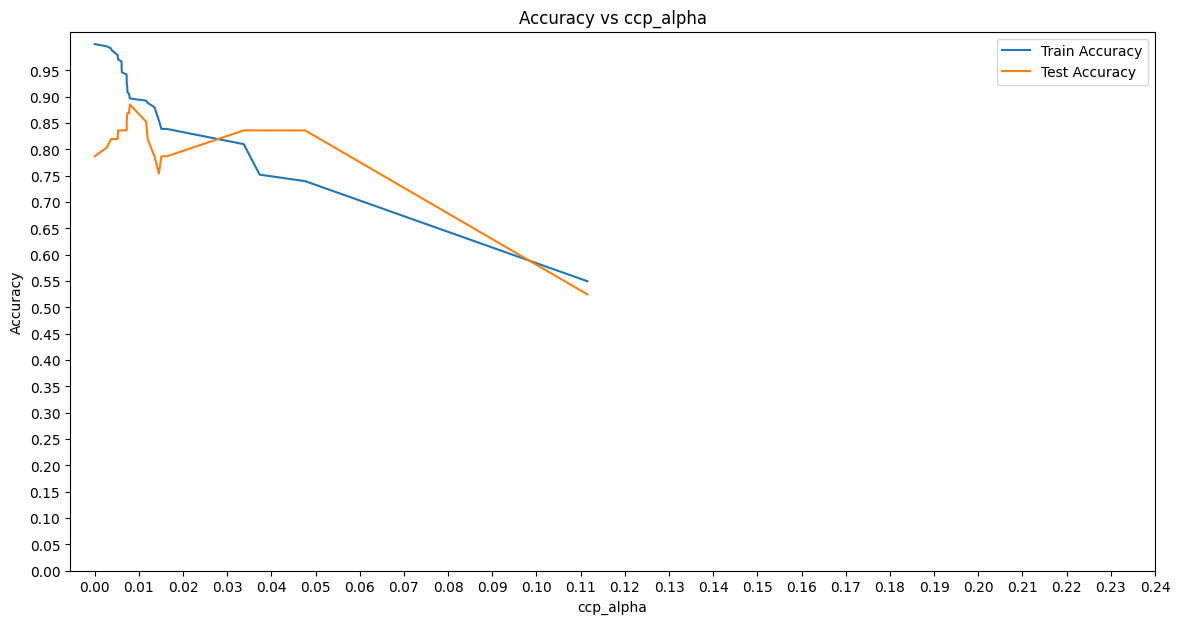

In [509]:
accuracy_train,accuracy_test = [],[]
for i in alphas:
    heart_disases_classifier = DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    heart_disases_classifier.fit(X_train,y_train)
    y_train_pred = heart_disases_classifier.predict(X_train)
    y_test_pred = heart_disases_classifier.predict(X_test)
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))

plt.figure(figsize=(14,7))
plt.plot(alphas, accuracy_train, label="Train Accuracy")
plt.plot(alphas, accuracy_test, label="Test Accuracy")
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs ccp_alpha')
plt.xticks(ticks=np.arange(0.00, 0.25, 0.01))
plt.yticks(np.arange(0.00, 1, 0.05))
plt.legend()
plt.show()

**As we notice from the graph the `test accuracy` `in its maximum  accuracy which is 0.88 when  cpp_alpha appriximatly equal 0.01`,
the difference between the test accuracy and training accuracy is approximataly 1%**

In [510]:
heart_disases_classifier = DecisionTreeClassifier(random_state=0,ccp_alpha=0.01)#after adding the cpp alpha =0.01 for best pruning results

In [511]:
heart_disases_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

In [512]:
y_pred = heart_disases_classifier.predict(X_test)
predict_train= heart_disases_classifier.predict(X_train)

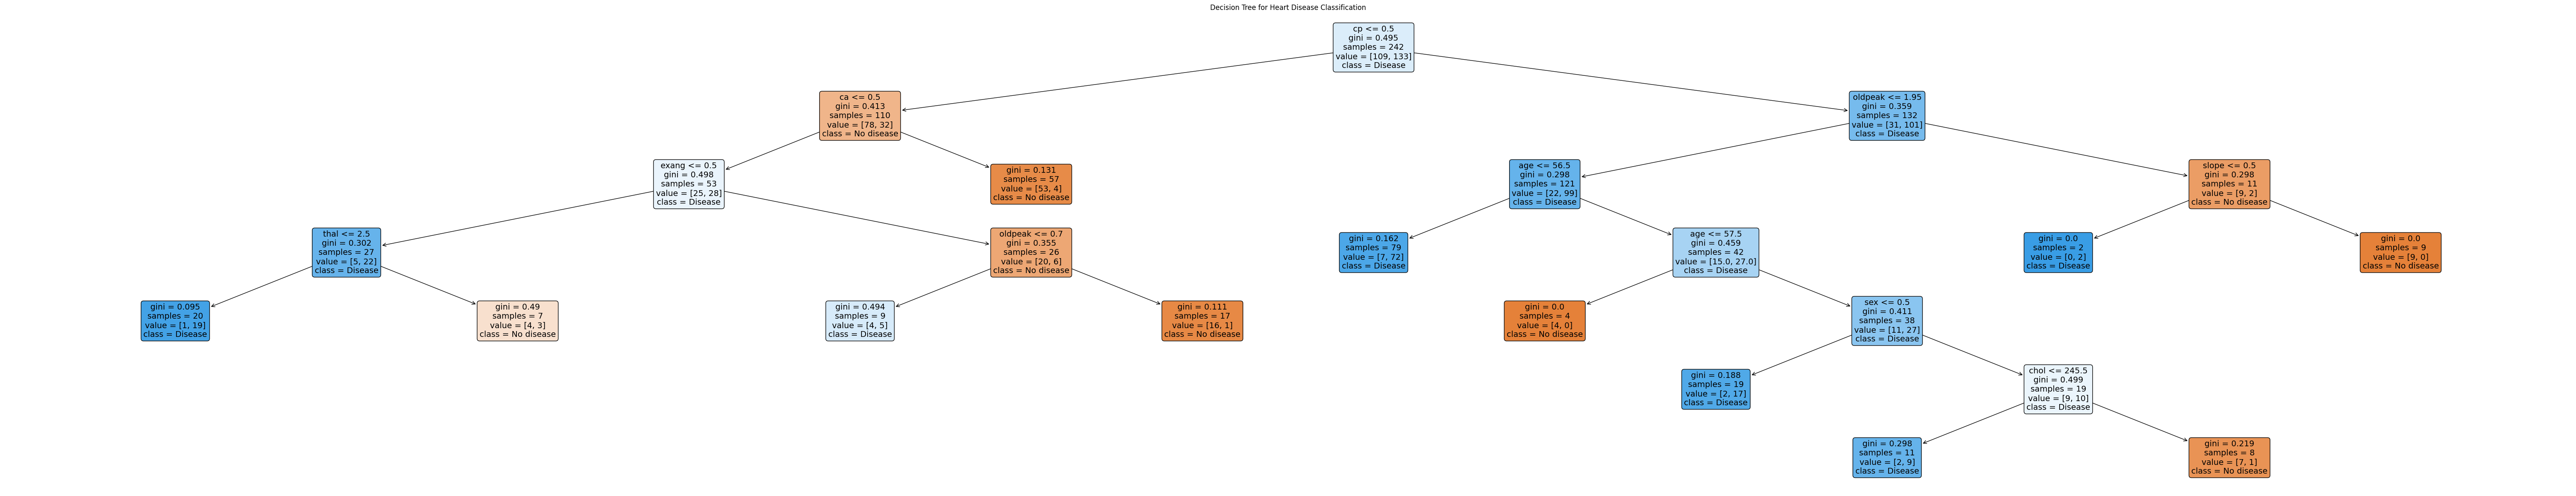

In [489]:
plt.figure(figsize=(80,15))
plot_tree(heart_disases_classifier, filled=True, feature_names=X.columns, class_names=['No disease', 'Disease'], rounded=True, fontsize=14)
plt.title("Decision Tree for Heart Disease Classification")
plt.show()

In [490]:
test_confusionMatrix = confusion_matrix(y_test,y_pred)
test_accuracy = accuracy(test_confusionMatrix)
training_confusionMatrix= confusion_matrix(y_train,predict_train)
training_accuracy = accuracy(training_confusionMatrix)

In [491]:
print("Test Confusion Matrix:")
print(test_confusionMatrix)
print("\n test Accuracy:", test_accuracy)
print("\n predicted train accuracy: ",training_accuracy)

Test Confusion Matrix:
[[28  1]
 [ 6 26]]

 test Accuracy: 0.8852459016393442

 predicted train accuracy:  0.8966942148760331
